In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [36]:
mal = pd.read_csv('Malaria screener.csv')

In [37]:
# Inspect the dataset
print("\nDataset Overview:\n", mal.head())
print("\nColumn Names:\n", mal.columns)


Dataset Overview:
             DHSID GPS_Dataset DHSCC  DHSYEAR  DHSCLUST   SurveyID  \
0  NG202100000001    NGGE81FL    NG     2021         1  NG2021MIS   
1  NG202100000002    NGGE81FL    NG     2021         2  NG2021MIS   
2  NG202100000003    NGGE81FL    NG     2021         3  NG2021MIS   
3  NG202100000004    NGGE81FL    NG     2021         4  NG2021MIS   
4  NG202100000005    NGGE81FL    NG     2021         5  NG2021MIS   

   All_Population_Count_2000  All_Population_Count_2005  \
0                4383.732422               10511.250980   
1               10095.720700               13841.389650   
2               34067.722660               44976.214840   
3                4087.095947                5683.123535   
4                 543.357239                 545.644714   

   All_Population_Count_2010  All_Population_Count_2015  ...  \
0                15821.37695               12767.423830  ...   
1                15144.12500               17101.576170  ...   
2                5

In [38]:
mal.columns.tolist()

['DHSID',
 'GPS_Dataset',
 'DHSCC',
 'DHSYEAR',
 'DHSCLUST',
 'SurveyID',
 'All_Population_Count_2000',
 'All_Population_Count_2005',
 'All_Population_Count_2010',
 'All_Population_Count_2015',
 'All_Population_Count_2020',
 'Aridity_2000',
 'Aridity_2005',
 'Aridity_2010',
 'Aridity_2015',
 'Aridity_2020',
 'Day_Land_Surface_Temp_2000',
 'Day_Land_Surface_Temp_2005',
 'Day_Land_Surface_Temp_2010',
 'Day_Land_Surface_Temp_2015',
 'Day_Land_Surface_Temp_2020',
 'Diurnal_Temperature_Range_2000',
 'Diurnal_Temperature_Range_2005',
 'Diurnal_Temperature_Range_2010',
 'Diurnal_Temperature_Range_2015',
 'Diurnal_Temperature_Range_2020',
 'Drought_Episodes',
 'Elevation',
 'Enhanced_Vegetation_Index_2000',
 'Enhanced_Vegetation_Index_2005',
 'Enhanced_Vegetation_Index_2010',
 'Enhanced_Vegetation_Index_2015',
 'Enhanced_Vegetation_Index_2020',
 'Frost_Days_2000',
 'Frost_Days_2005',
 'Frost_Days_2010',
 'Frost_Days_2015',
 'Frost_Days_2020',
 'Global_Human_Footprint',
 'Growing_Season_Length'

In [39]:
# Identify ITN Coverage Column
itn_col = None
for col in mal.columns:
    if "ITN" in col.upper() or "NET" in col.upper():
        itn_col = col
        break

if not itn_col:
    print("\n⚠️ No 'ITN Coverage' column found. Please confirm the correct column name.")
else:
    print(f"\n✅ Found ITN Coverage column: '{itn_col}'")


✅ Found ITN Coverage column: 'ITN_Coverage_2000'


In [40]:
# Group Data by ITN Coverage
if itn_col:
    grouped_data = mal.groupby(itn_col)['Malaria_Prevalence_2020'].agg(['mean', 'count'])
    print("\n📊 Malaria Prevalence by ITN Coverage:\n", grouped_data)


📊 Malaria Prevalence by ITN Coverage:
                        mean  count
ITN_Coverage_2000                 
0.027650           0.140885      1
0.028051           0.143014      1
0.028523           0.079607      1
0.028655           0.151334      1
0.029079           0.112401      1
...                     ...    ...
0.092208           0.556282      1
0.093149           0.236816      1
0.097789           0.191501      1
0.103461           0.325517      1
0.107257           0.197388      1

[547 rows x 2 columns]


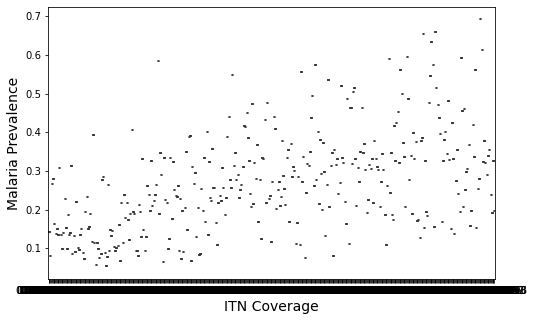

In [42]:
 # Visualize Differences
plt.figure(figsize=(8, 5))
sns.boxplot(data=mal, x=itn_col, y='Malaria_Prevalence_2020', palette='coolwarm')
#plt.title('Malaria Prevalence by ITN Coverage')
plt.xlabel('ITN Coverage', fontsize=14)
plt.ylabel('Malaria Prevalence', fontsize=14)
plt.show()

    Malaria Prevalence by ITN Coverage

scatterplot & T-test Results

* Shows whether malaria prevalence differs significantly between ITN users & non-users.
* If p-value < 0.05, ITNs significantly reduce malaria risk.

In [43]:
 # Perform T-test to Check Significance
itn_users = mal[mal[itn_col] == 1]['Malaria_Prevalence_2020']
non_itn_users = mal[mal[itn_col] == 0]['Malaria_Prevalence_2020']

t_stat, p_value = ttest_ind(itn_users, non_itn_users, equal_var=False)
print("\n🎯 T-Test Results:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4e}")

if p_value < 0.05:
    print("✅ Significant difference found! ITN coverage affects malaria prevalence.")
else:
    print("⚠️ No significant difference found. ITN coverage may not be effective alone.")


🎯 T-Test Results:
T-statistic: nan, P-value: nan
⚠️ No significant difference found. ITN coverage may not be effective alone.


Regression Analysis

* Simple regression: Tests if ITNs alone reduce malaria prevalence.
* Adjusted regression: Controls for other variables.

In [44]:
# Regression Analysis to Control for Other Factors
formula = 'Malaria_Prevalence_2020 ~ ' + itn_col
model = smf.ols(formula, data=mal).fit()
print("\n🔬 Regression Results:\n", model.summary())


🔬 Regression Results:
                                OLS Regression Results                              
Dep. Variable:     Malaria_Prevalence_2020   R-squared:                       0.255
Model:                                 OLS   Adj. R-squared:                  0.254
Method:                      Least Squares   F-statistic:                     193.7
Date:                     Sat, 15 Feb 2025   Prob (F-statistic):           4.42e-38
Time:                             14:48:56   Log-Likelihood:                 442.43
No. Observations:                      567   AIC:                            -880.9
Df Residuals:                          565   BIC:                            -872.2
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [45]:
# Additional Analysis - Combine with Socioeconomic Factors
socio_factors = ['Mean_Temperature_2000', 'Rainfall_2020', 'Mean_Temperature_2020', 'Precipitation_2020']
available_factors = [factor for factor in socio_factors if factor in mal.columns]

if available_factors:
    full_formula = 'Malaria_Prevalence_2020 ~ ' + ' + '.join([itn_col] + available_factors)
    full_model = smf.ols(full_formula, data=mal).fit()
    print("\n📌 Adjusted Regression Including Socioeconomic & Climate Factors:\n", full_model.summary())


📌 Adjusted Regression Including Socioeconomic & Climate Factors:
                                OLS Regression Results                              
Dep. Variable:     Malaria_Prevalence_2020   R-squared:                       0.330
Model:                                 OLS   Adj. R-squared:                  0.324
Method:                      Least Squares   F-statistic:                     55.34
Date:                     Sat, 15 Feb 2025   Prob (F-statistic):           9.86e-47
Time:                             14:49:04   Log-Likelihood:                 472.51
No. Observations:                      567   AIC:                            -933.0
Df Residuals:                          561   BIC:                            -907.0
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---

If ITN usage does not significantly reduce malaria, it could mean: 
* Low net quality (e.g., old, torn nets)
* Incorrect use (e.g., not using nets properly)